In [1]:
import pandas as pd
from io import StringIO

csv_data = \
    """A,B,C,D
    1.,2.,3.,4.
    5.,6.,,8.
    10.,11.,12.,
    """

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
df.isna().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [5]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [10]:
df.dropna(axis=1, subset=[2])

,A,B,C
0,1.0,2.0,3.0
1,5.0,6.0,NaN
2,10.0,11.0,12.0


In [11]:
import numpy as np
np.version.version

'1.26.4'

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)

imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [13]:
from sklearn.preprocessing import FunctionTransformer

ftr_imr = FunctionTransformer(lambda X: imr.fit_transform(X.T).T, validate=False)

imputed_data = ftr_imr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

In [14]:
imr = SimpleImputer(add_indicator=True)
imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ,  0. ,  0. ],
       [ 5. ,  6. ,  7.5,  8. ,  1. ,  0. ],
       [10. , 11. , 12. ,  6. ,  0. ,  1. ]])

In [15]:
imr.indicator_.features_

array([2, 3])

In [16]:
imr.indicator_.fit_transform(df.values)

array([[False, False],
       [ True, False],
       [False,  True]])

In [17]:
imr.inverse_transform(imputed_data)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iimr = IterativeImputer()
iimr.fit_transform(df.values)

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.00047063,  8.        ],
       [10.        , 11.        , 12.        , 12.99964527]])

In [19]:
from sklearn.impute import KNNImputer

kimr = KNNImputer()
kimr.fit_transform(df.values)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [20]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [21]:
df.fillna(method='bfill')

/tmp/ipykernel_270732/2831856154.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,12.0,8.0
2,10.0,11.0,12.0,NaN


In [22]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class']
])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class


In [23]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class


In [24]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [25]:
class_mapping = {label: idx for idx, label in
                 enumerate(np.unique(df['classlabel']))}

class_mapping

{'class': 0, 'class1': 1, 'class2': 2}

In [26]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,2
2,blue,3,15.3,0


In [27]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class


In [28]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 2, 0])

In [29]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class'], dtype=object)

In [30]:
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()

X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color'])])

X_trans = col_trans.fit_transform(df)
X_trans

array([[1],
       [2],
       [0]])

In [32]:
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [33]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values

color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [34]:
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [35]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


In [36]:
pd.get_dummies(df[['price', 'color', 'size']], columns=['size'])

,price,color,size_1,size_2,size_3
0,10.1,green,True,False,False
1,13.5,red,False,True,False
2,15.3,blue,False,False,True


In [37]:
pd.get_dummies(df[['price', 'color', 'size']],
               drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [38]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X)

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

In [39]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class


In [40]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class,1,1


In [41]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/'
                      'wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print("Class label", np.unique(df_wine['Class label']))

Class label [1 2 3]


In [42]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

In [44]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [45]:
X_train_norm[:5]

array([[0.64619883, 0.83201581, 0.4248366 , 0.46236559, 0.27160494,
        0.35172414, 0.09704641, 0.68      , 0.18987342, 0.23623446,
        0.45744681, 0.28571429, 0.19400856],
       [0.6871345 , 0.15612648, 0.65359477, 0.43548387, 0.7654321 ,
        0.67931034, 0.50632911, 0.74      , 0.2943038 , 0.3250444 ,
        0.81914894, 0.63369963, 0.68259629],
       [0.67836257, 0.15019763, 0.65359477, 0.59677419, 0.38271605,
        0.69655172, 0.61392405, 0.32      , 0.62025316, 0.35168739,
        0.75531915, 0.52747253, 0.71825963],
       [0.61403509, 0.20948617, 0.62091503, 0.40860215, 0.49382716,
        0.47241379, 0.46202532, 0.32      , 0.35443038, 0.21847247,
        0.65957447, 0.58608059, 0.58273894],
       [0.34795322, 0.33992095, 0.32679739, 0.38172043, 0.2962963 ,
        0.22068966, 0.06751055, 1.        , 0.16455696, 0.47602131,
        0.26595745, 0.11355311, 0.29743224]])

In [46]:
X_train[:5]

array([[1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
        8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.376e+01, 1.530e+00, 2.700e+00, 1.950e+01, 1.320e+02, 2.950e+00,
        2.740e+00, 5.000e-01, 1.350e+00, 5.400e+00, 1.250e+00, 3.000e+00,
        1.235e+03],
       [1.373e+01, 1.500e+00, 2.700e+00, 2.250e+01, 1.010e+02, 3.000e+00,
        3.250e+00, 2.900e-01, 2.380e+00, 5.700e+00, 1.190e+00, 2.710e+00,
        1.285e+03],
       [1.351e+01, 1.800e+00, 2.650e+00, 1.900e+01, 1.100e+02, 2.350e+00,
        2.530e+00, 2.900e-01, 1.540e+00, 4.200e+00, 1.100e+00, 2.870e+00,
        1.095e+03],
       [1.260e+01, 2.460e+00, 2.200e+00, 1.850e+01, 9.400e+01, 1.620e+00,
        6.600e-01, 6.300e-01, 9.400e-01, 7.100e+00, 7.300e-01, 1.580e+00,
        6.950e+02]])

In [47]:
ex = np.array([0, 1, 2, 3, 4, 5])
print("Standardization: ", (ex - ex.mean()) / ex.std())
print("Regularization: ", (ex - ex.min())/(ex.max() - ex.min()))

Standardization:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Regularization:  [0.  0.2 0.4 0.6 0.8 1. ]


In [48]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [49]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

In [50]:
(ex - np.percentile(ex, 50)) / (np.percentile(ex, 75) - np.percentile(ex, 25))

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [51]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()

X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.transform(X_test)

In [52]:
ex / np.max(np.abs(ex))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [53]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale, maxabs_scale

print("StandardScaler: ", scale(ex))
print("MinMaxScaler: ", minmax_scale(ex))
print("RobustScaler: ", robust_scale(ex))
print("MaxAbsScaler: ", maxabs_scale(ex))

StandardScaler:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
MinMaxScaler:  [0.  0.2 0.4 0.6 0.8 1. ]
RobustScaler:  [-1.  -0.6 -0.2  0.2  0.6  1. ]
MaxAbsScaler:  [0.  0.2 0.4 0.6 0.8 1. ]


In [54]:
from scipy import sparse

X_train_sparse = sparse.csr_matrix(X_train)
X_train_maxabs = mas.fit_transform(X_train_sparse)

X_train_maxabs[:3]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 39 stored elements and shape (3, 13)>

In [55]:
X_train_robust = rbs.transform(X_train_sparse)

In [56]:
from sklearn.preprocessing import Normalizer

nrm = Normalizer()
X_train_l2 = nrm.fit_transform(X_train)

In [57]:
ex_2f = np.vstack((ex[1:], ex[1:]**2))
ex_2f

array([[ 1,  2,  3,  4,  5],
       [ 1,  4,  9, 16, 25]])

In [58]:
l2_norm = np.sqrt(np.sum(ex_2f ** 2, axis=1))
print(l2_norm)

[ 7.41619849 31.28897569]


In [59]:
l2_norm.reshape(-1, 1)

array([[ 7.41619849],
       [31.28897569]])

In [60]:
ex_2f / l2_norm.reshape(-1, 1)

array([[0.13483997, 0.26967994, 0.40451992, 0.53935989, 0.67419986],
       [0.03196014, 0.12784055, 0.28764125, 0.51136222, 0.79900347]])

In [61]:
ex_norm = nrm.fit_transform(ex_2f)
ex_norm

array([[0.13483997, 0.26967994, 0.40451992, 0.53935989, 0.67419986],
       [0.03196014, 0.12784055, 0.28764125, 0.51136222, 0.79900347]])

In [62]:
l1_norm = np.sum(np.abs(ex_2f), axis=1)
print(l1_norm)

[15 55]


In [63]:
ex_2f / l1_norm.reshape(-1, 1)

array([[0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333],
       [0.01818182, 0.07272727, 0.16363636, 0.29090909, 0.45454545]])

In [64]:
nrm1 = Normalizer(norm='l1')
nrm1.fit_transform(ex_2f)

array([[0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333],
       [0.01818182, 0.07272727, 0.16363636, 0.29090909, 0.45454545]])

In [65]:
max_norm = np.max(np.abs(ex_2f), axis=1)
print(max_norm)

[ 5 25]


In [66]:
ex_2f / max_norm.reshape(-1, 1)

array([[0.2 , 0.4 , 0.6 , 0.8 , 1.  ],
       [0.04, 0.16, 0.36, 0.64, 1.  ]])

In [67]:
nrm2 = Normalizer(norm='max')
nrm2.fit_transform(ex_2f)

array([[0.2 , 0.4 , 0.6 , 0.8 , 1.  ],
       [0.04, 0.16, 0.36, 0.64, 1.  ]])

In [68]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1', C=1.0, random_state=1)

In [69]:
lr.fit(X_train_std, y_train)
print("Train Accuracy: ", lr.score(X_train_std, y_train))

Train Accuracy:  1.0


In [70]:
print("Test Accuracy: ", lr.score(X_test_std, y_test))

Test Accuracy:  1.0


In [71]:
lr.intercept_

array([-1.26392152, -1.21596534, -2.37040177])

In [72]:
lr.coef_

array([[ 1.24567209,  0.18072301,  0.74682115, -1.16438451,  0.        ,
         0.        ,  1.1595535 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55864751,  2.50891241],
       [-1.53644846, -0.38769843, -0.99485417,  0.36489012, -0.05989298,
         0.        ,  0.66853184,  0.        ,  0.        , -1.93460212,
         1.23246414,  0.        , -2.23212696],
       [ 0.1355558 ,  0.16880291,  0.35718019,  0.        ,  0.        ,
         0.        , -2.43768478,  0.        ,  0.        ,  1.5635432 ,
        -0.81834553, -0.4930494 ,  0.        ]])

/home/arti/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


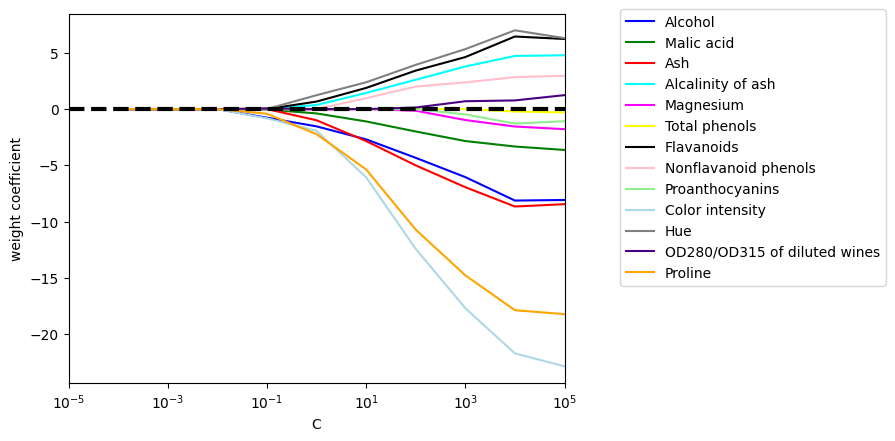

In [73]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear',
                            penalty='l1', C=10.**c,
                            random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [77]:
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
        
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])

        self.k_score_ = self.scores_[-1]

        return self
    
    def transform(self, X, y):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [78]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=2)
sbs.fit(X_train_std, y_train)

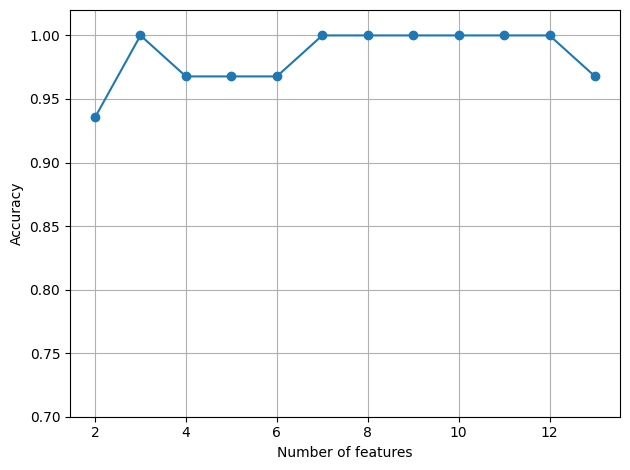

In [79]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [80]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [81]:
knn.fit(X_train_std, y_train)

print("Train Accuracy: ", knn.score(X_train_std, y_train))

Train Accuracy:  0.967741935483871


In [82]:
print("Test Accuracy: ", knn.score(X_test_std, y_test))

Test Accuracy:  0.9629629629629629


In [84]:
knn.fit(X_train_std[:, k3], y_train)
print("Train Accuracy: ", knn.score(X_train_std[:, k3], y_train))
print("Test Accuracy: ", knn.score(X_test_std[:, k3], y_test))

Train Accuracy:  0.9516129032258065
Test Accuracy:  0.9259259259259259


In [85]:
from sklearn.feature_selection import SequentialFeatureSelector

scores = []
for n_features in range(1, 13):
    sfs = SequentialFeatureSelector(knn, n_features_to_select=n_features, n_jobs=-1)
    sfs.fit(X_train_std, y_train)
    f_mask = sfs.support_
    knn.fit(X_train_std[:, f_mask], y_train)
    scores.append(knn.score(X_train_std[:, f_mask], y_train))

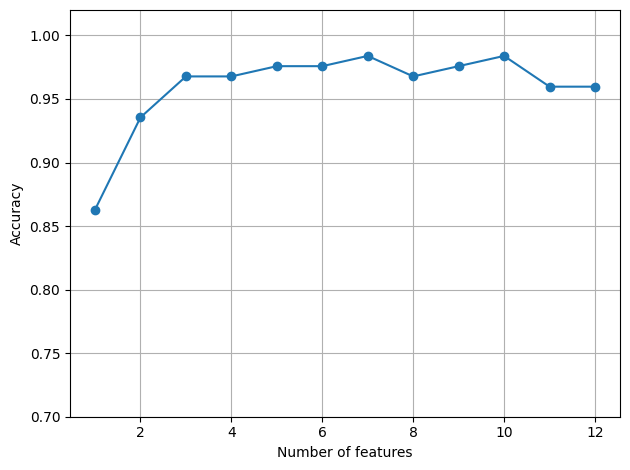

In [86]:
plt.plot(range(1, 13), scores, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [87]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=7, n_jobs=-1)
sfs.fit(X_train_std, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=7, n_jobs=-1)

In [88]:
print(sfs.n_features_to_select_)

7


In [89]:
f_mask = sfs.support_

In [97]:
df_wine.columns[1:][f_mask]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [99]:
knn.fit(X_train_std[:, f_mask], y_train)
print("Train Accuracy:", knn.score(X_train_std[:, f_mask], y_train))
print("Test Accuracy:", knn.score(X_test_std[:, f_mask], y_test))

Train Accuracy: 0.9838709677419355
Test Accuracy: 0.9814814814814815


 1) Proline                         0.185453
 2) Flavanoids                      0.174751
 3) Color intensity                 0.143920
 4) OD280/OD315 of diluted wines    0.136162
 5) Alcohol                         0.118529
 6) Hue                             0.058739
 7) Total phenols                   0.050872
 8) Magnesium                       0.031357
 9) Malic acid                      0.025648
10) Proanthocyanins                 0.025570
11) Alcalinity of ash               0.022366
12) Nonflavanoid phenols            0.013354
13) Ash                             0.013279


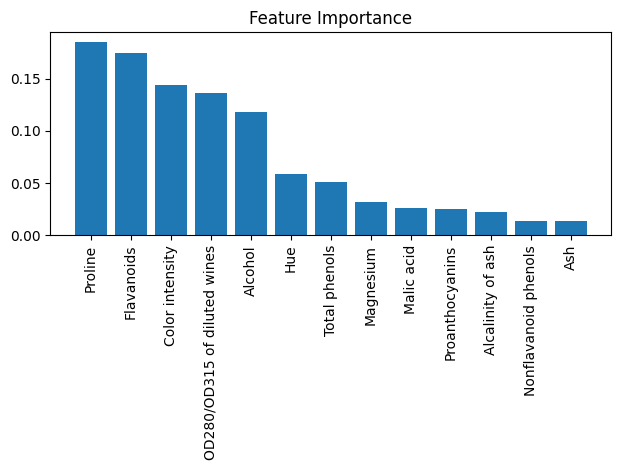

In [101]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s % f" %(f + 1, 30, feat_labels[indices[f]],
                            importances[indices[f]]))
    
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [102]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

print("Samples count :", X_selected.shape[1])

Samples count : 5


In [103]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s % f" %(f + 1, 30, feat_labels[indices[f]],
                            importances[indices[f]]))

 1) Proline                         0.185453
 2) Flavanoids                      0.174751
 3) Color intensity                 0.143920
 4) OD280/OD315 of diluted wines    0.136162
 5) Alcohol                         0.118529


In [104]:
from sklearn.feature_selection import RFE

rfe = RFE(forest, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=500, random_state=1),
    n_features_to_select=5)

In [105]:
rfe.ranking_

array([1, 5, 9, 6, 4, 3, 1, 8, 7, 1, 2, 1, 1])

In [106]:
f_mask = rfe.support_
importances = rfe.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
for i in indices:
    print("%2d) %-*s % f" %(f + 1, 30, feat_labels[f_mask][i],
                            importances[i]))

 5) Proline                         0.261512
 5) Color intensity                 0.216477
 5) Flavanoids                      0.212259
 5) OD280/OD315 of diluted wines    0.188924
 5) Alcohol                         0.120828
